# Przetwarzanie danych złożonych - lab 1 - proces Hawkesa

W oparciu o dowolny zbiór danych:

- analiza zbioru i uzasadnienie dlaczego nadaje się do modelowania procesem Hawkesa (2pkt)
- wybór odpowiedniego procesu Hawkesa/krenela do danych i dopasowanie parametrów dla dwóch kaskad (4pkt)
- porównanie dynamiki dwóch kaskad na podstawie parametrów procesu Hawkesa (2pkt)
- przewidzenie końcowego rozmiaru kaskady (2pkt)

## wczytanie danych
Dane pochodzą ze strony [https://archive.org/details/stackexchange]() i dotyczą aktywności użytkowników na portalu StackOverflow. Wybrany został podzbiór dotyczący otrzymywanych przez użytkowników odznak (*badges*), które dostaje się za wykonywanie różnych aktywności angażujących społeczność. Można podejrzewać w tym zbiorze występowanie zjawiska samo-ekscytacji, ponieważ zdobycie nowego *badge* może ułatwiać zdobycie kolejnego (np. gdy część warunków na otrzymanie się pokrywa, albo pociąga za sobą innego rodzaju aktywność). Ponadto, *badges* są podzielone na 3 klasy, które informują o ich unikalności i ta informacja została wykorzystana jako *magnitude* modelu. 

Opis danych i podstawowa wizualizacja w notebooku `eda.ipynb`. Zostało w nim wykonane między innymi:
- parsowanie xml,
- zawężenie zakresu danych do lat 2021-2022,
- wykres najpopularniejszych użytkowników, czyli tych, którzy otrzymali najwięcej *badges*,
- wykres otrzymywanych *badges* w czasie,
- export danych do formy przyjaznej dla evently.

Do analizy wybranych zostało 2 użytkowników którzy w latach 2021-2022 otrzymali najwięcej *badges* na stacku dotyczącym AI.

In [1]:
library(evently)
library(repr)
options(repr.plot.width=14, repr.plot.height=7, repr.plot.res = 200)
set.seed(13)

user1_cascade = read.csv("ai.stackexchange.com/user_2444.csv")
user2_cascade = read.csv("ai.stackexchange.com/user_1847.csv")

## dopasowanie modeli

Modele zostały dopasowane do pierwszego roku danych (z 2 lat).

In [2]:
observation_time <- 365*2
train_time <- 365 

split_and_fit <- function(history, train_time, model_type) {
    train_history <- history[with(history, time <= train_time),]
    fitted_model <- fit_series(train_history, model_type = model_type, observation_time = observation_time, cores = 8)
    return(fitted_model)
}

### użytkownik (kaskada) 1

#### model

In [3]:
user1_model <- split_and_fit(user1_cascade, train_time, "EXP")
user1_model

- Model: EXP 
- No. of cascades: 1 
- init_par:
  K 7.10e+00; theta 1.09e+00
- par:
  K 9.81e-01; theta 4.75e-02
- Neg Log Likelihood: 163.341 
- lower_bound:
  K 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; theta 3.00e+02
- Convergence: 0 

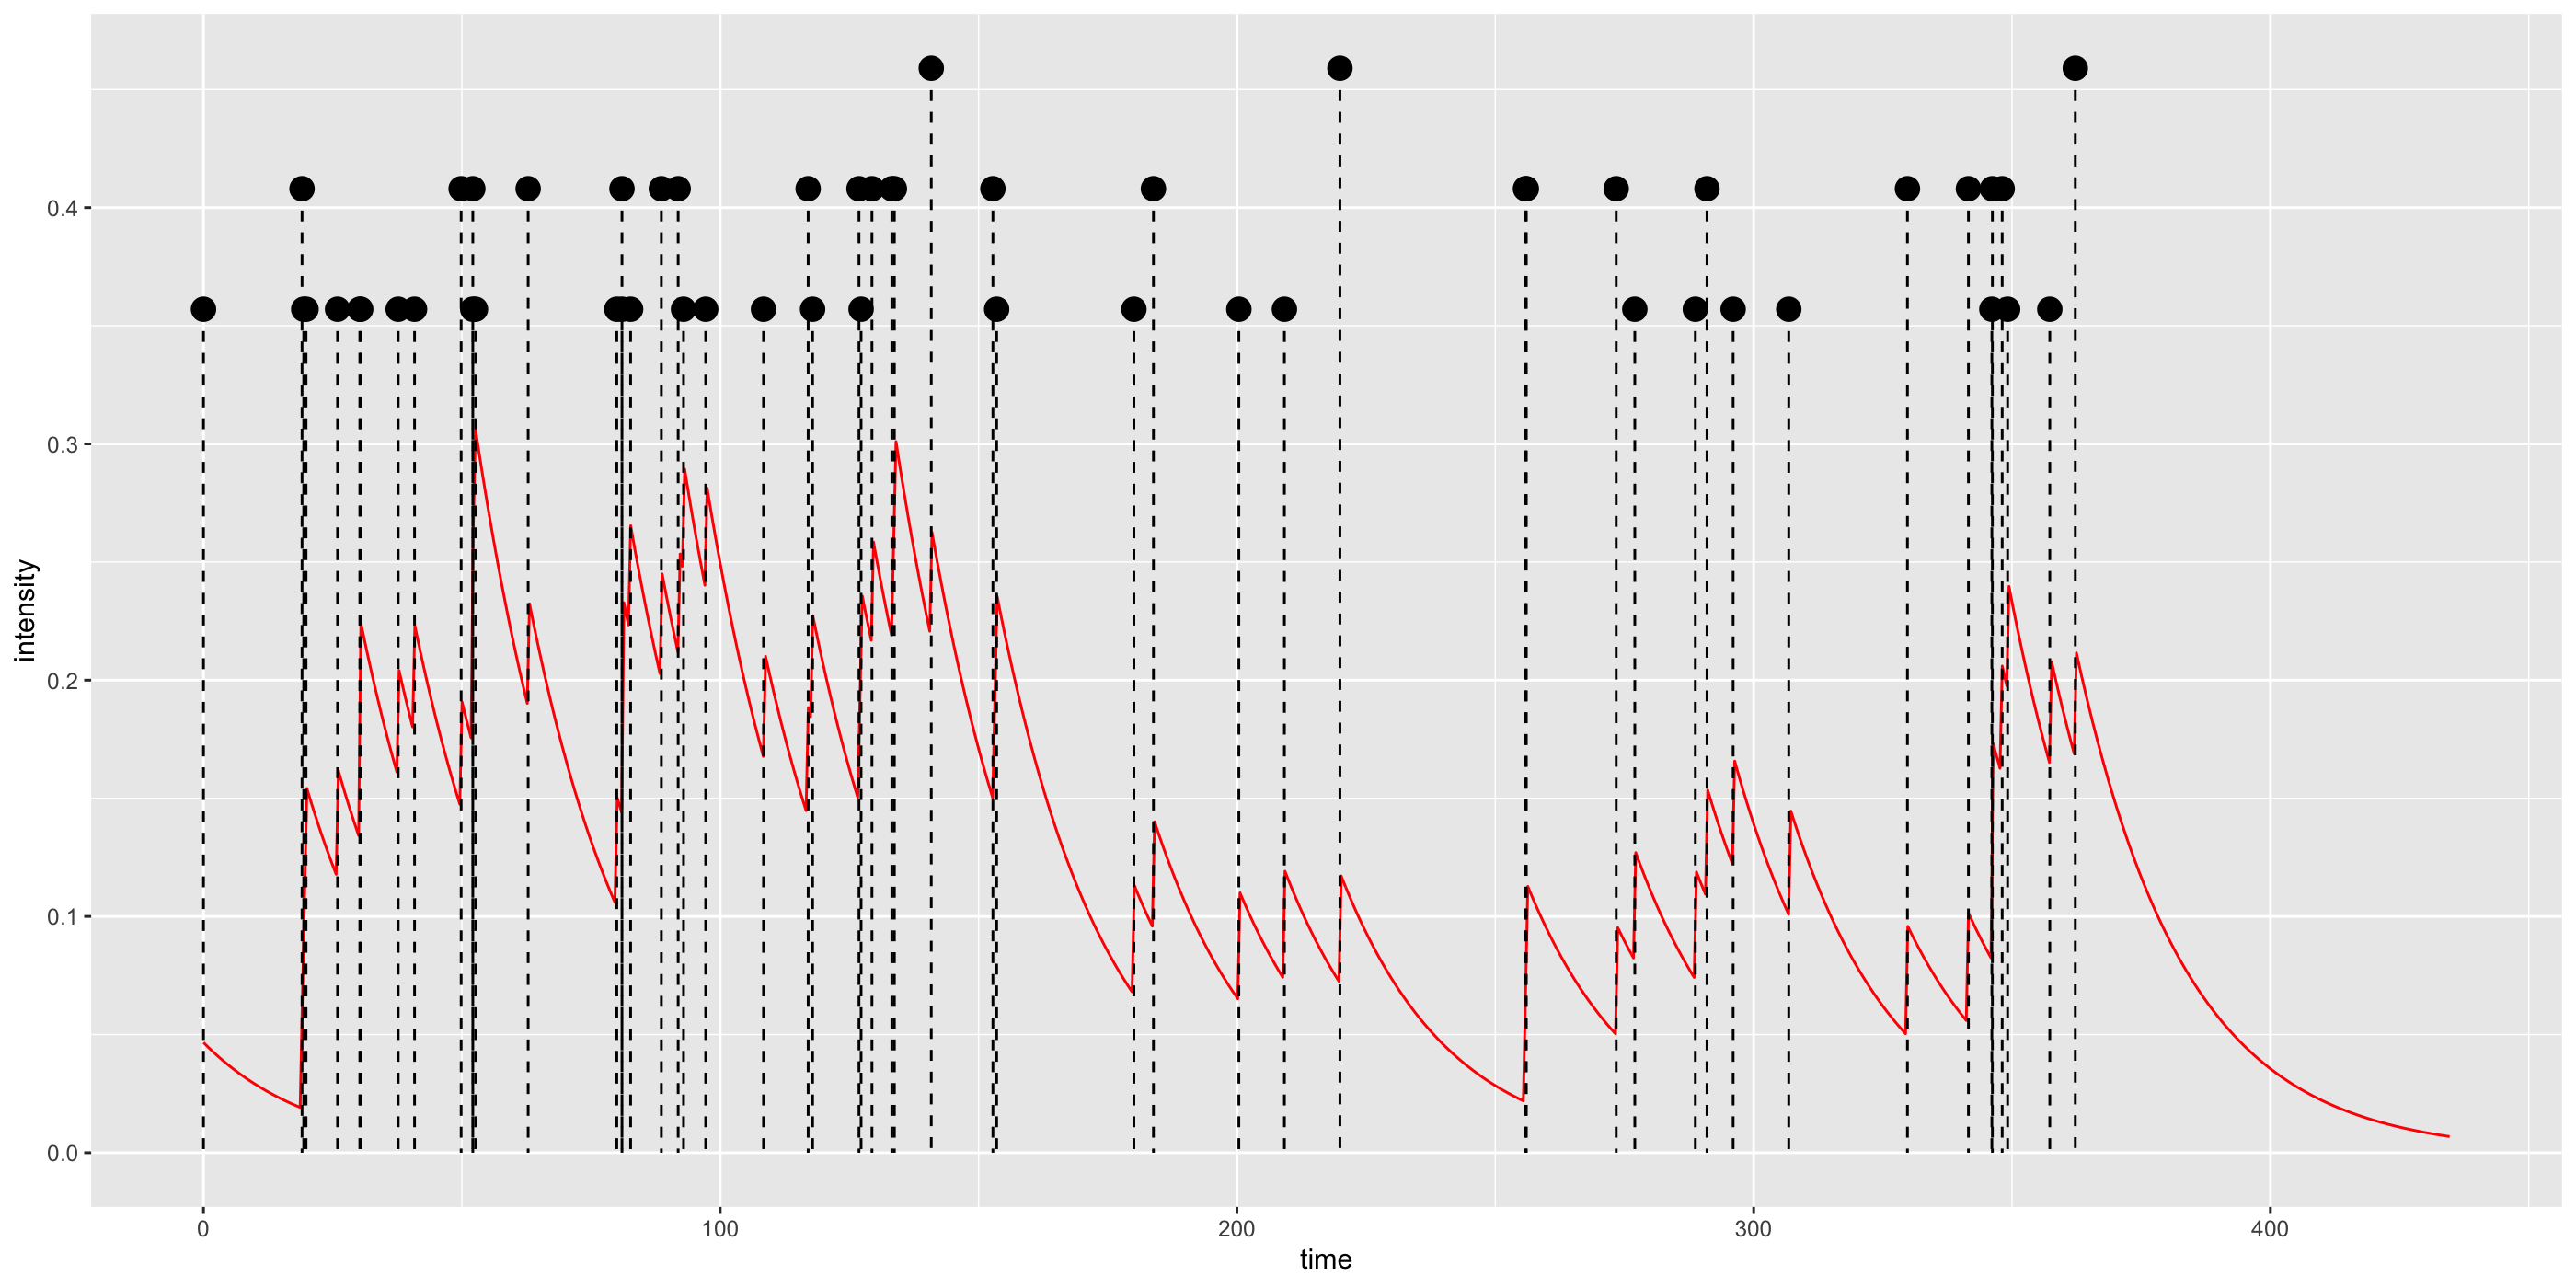

In [4]:
plot_event_series(user1_model)

#### współczynnik $n^*$

In [5]:
get_branching_factor(user1_model)

[1] 0.981481

#### końcowa popularność (ilość *badges*)

In [6]:
final_pop1 = predict_final_popularity(user1_model, observation_time = observation_time)
true_final_pop1 = nrow(user1_cascade)

sprintf("Predykowana końcowa popularność: %0.0f", final_pop1)
sprintf("Prawdziwa końcowa popularność: %0.0f", true_final_pop1)
sprintf("Błąd względny: %0.2f%%", 100*abs(true_final_pop1-final_pop1)/true_final_pop1)

[1] "Predykowana końcowa popularność: 54"

[1] "Prawdziwa końcowa popularność: 94"

[1] "Błąd względny: 42.55%"

### użytkownik (kaskada) 2

In [7]:
user2_model <- split_and_fit(user2_cascade, train_time, "EXP")
user2_model

- Model: EXP 
- No. of cascades: 1 
- init_par:
  K 6.20e+00; theta 1.81e+00
- par:
  K 9.47e-01; theta 2.53e-02
- Neg Log Likelihood: 78.2284 
- lower_bound:
  K 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; theta 3.00e+02
- Convergence: 0 

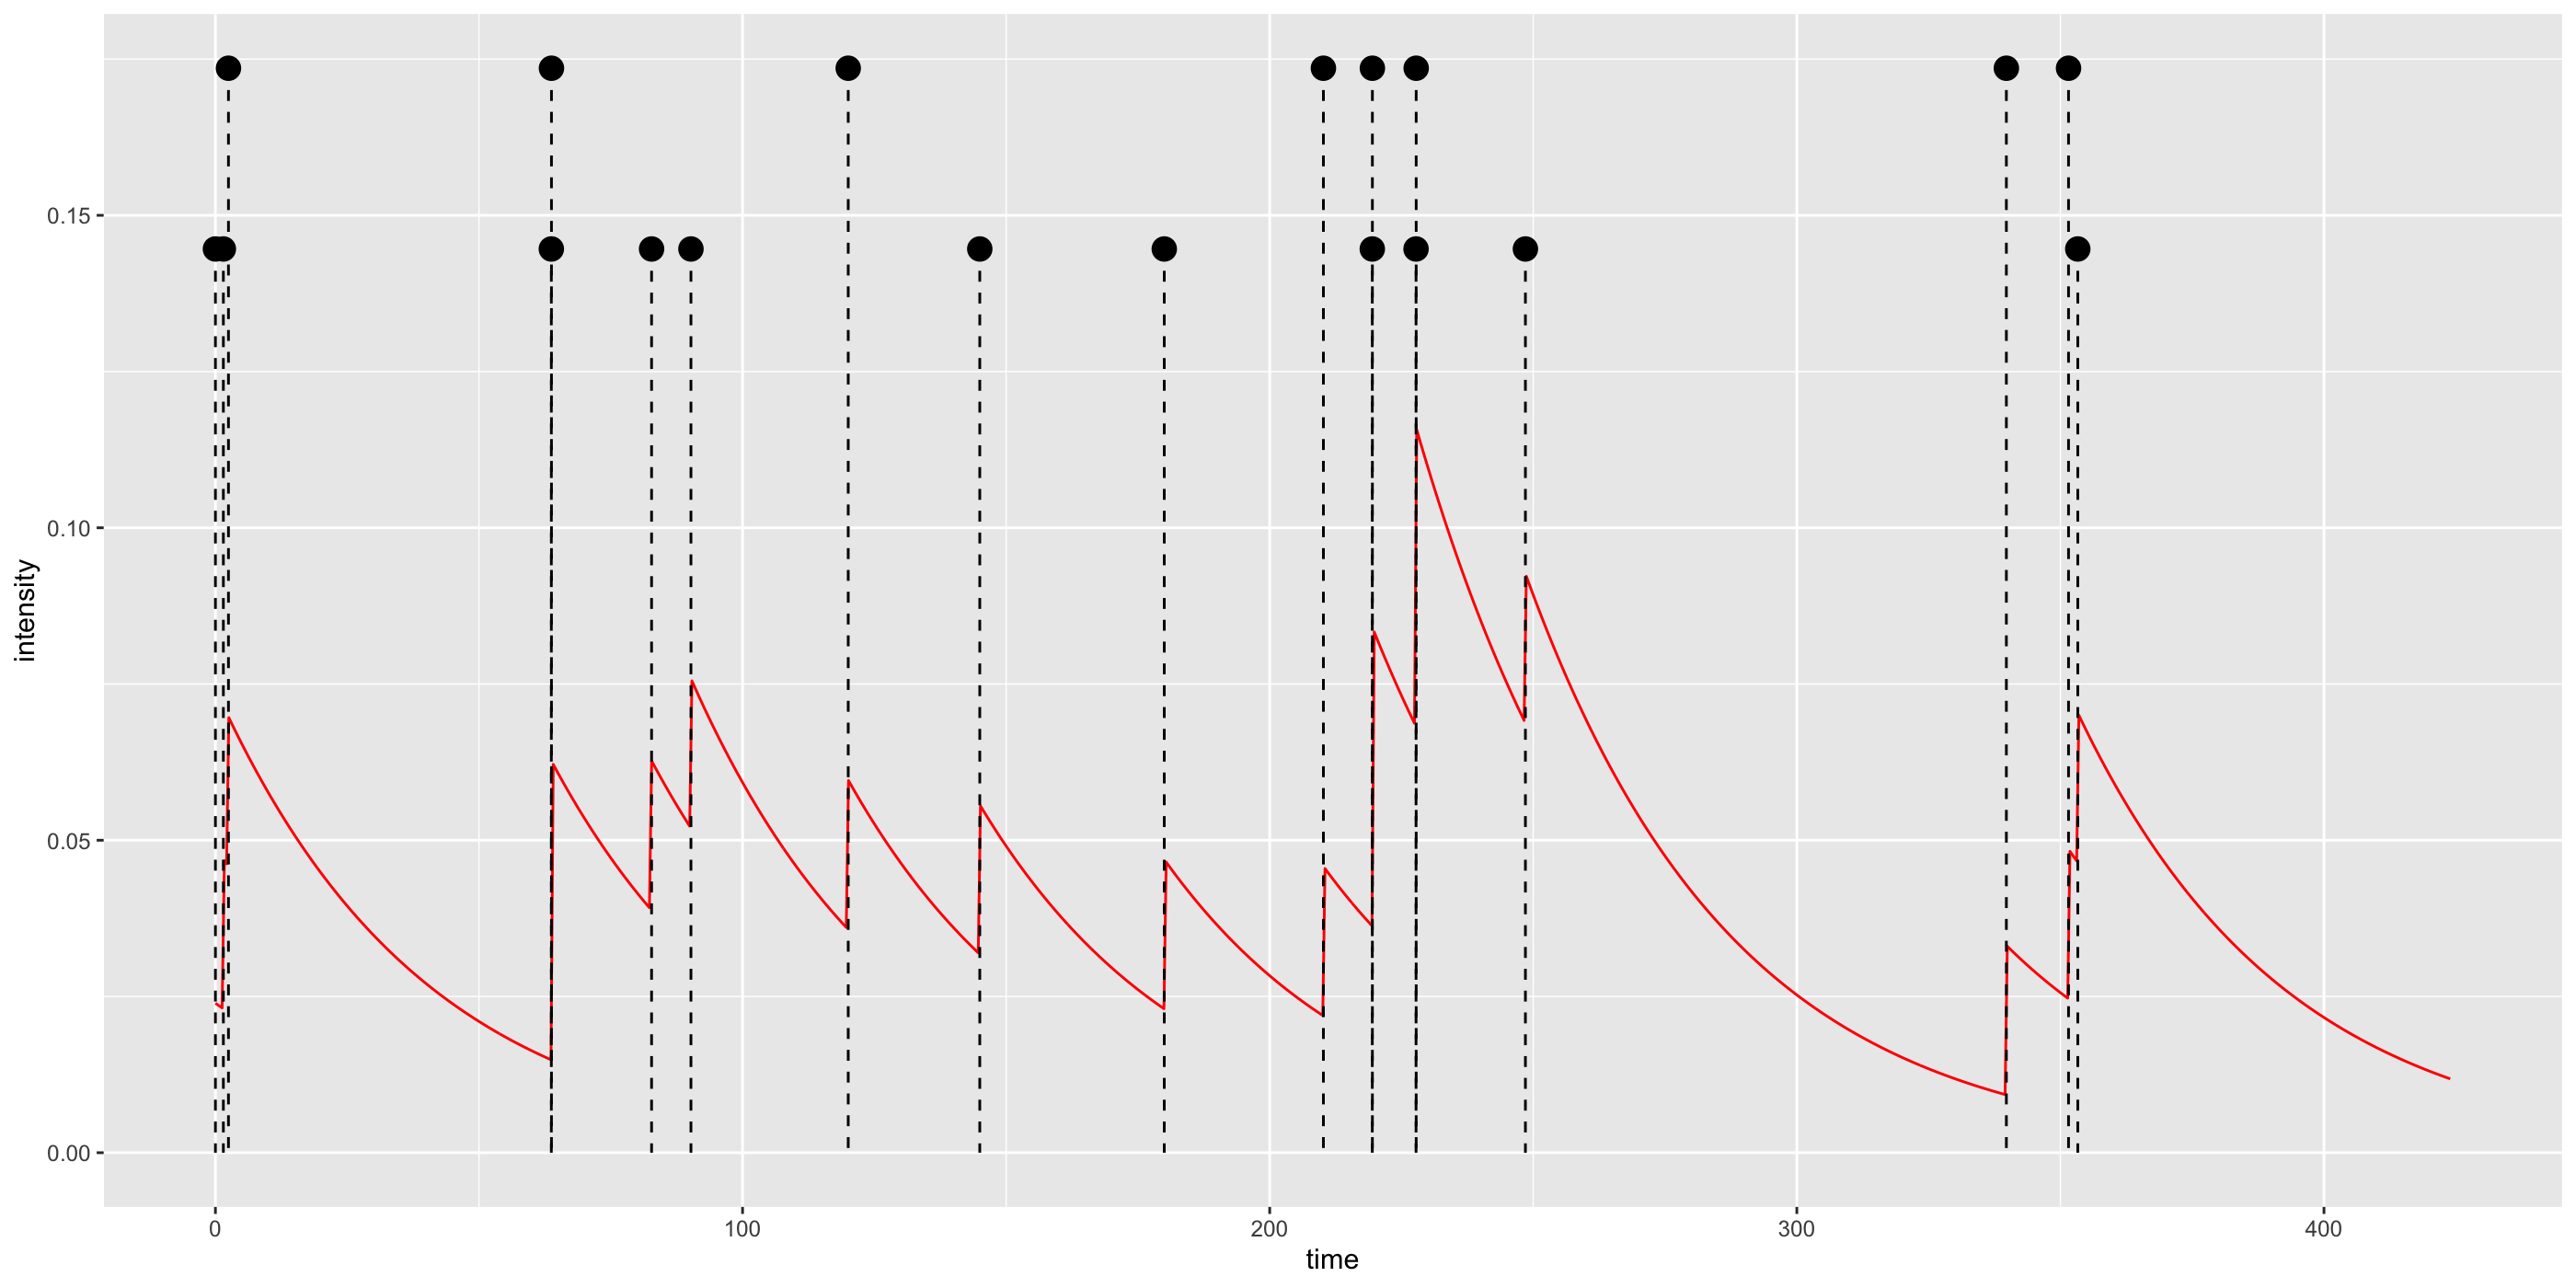

In [8]:
plot_event_series(user2_model)

#### współczynnik $n^*$

In [9]:
get_branching_factor(user2_model)

[1] 0.947379

#### końcowa popularność (ilość *badges*)

In [10]:
final_pop2 = predict_final_popularity(user2_model, observation_time = observation_time)
true_final_pop2 = nrow(user2_cascade)

sprintf("Predykowana końcowa popularność: %0.0f", final_pop2)
sprintf("Prawdziwa końcowa popularność: %0.0f", true_final_pop2)
sprintf("Błąd względny: %0.2f%%", 100*abs(true_final_pop2-final_pop2)/true_final_pop2)

[1] "Predykowana końcowa popularność: 19"

[1] "Prawdziwa końcowa popularność: 28"

[1] "Błąd względny: 32.13%"

## porównanie użytkowników

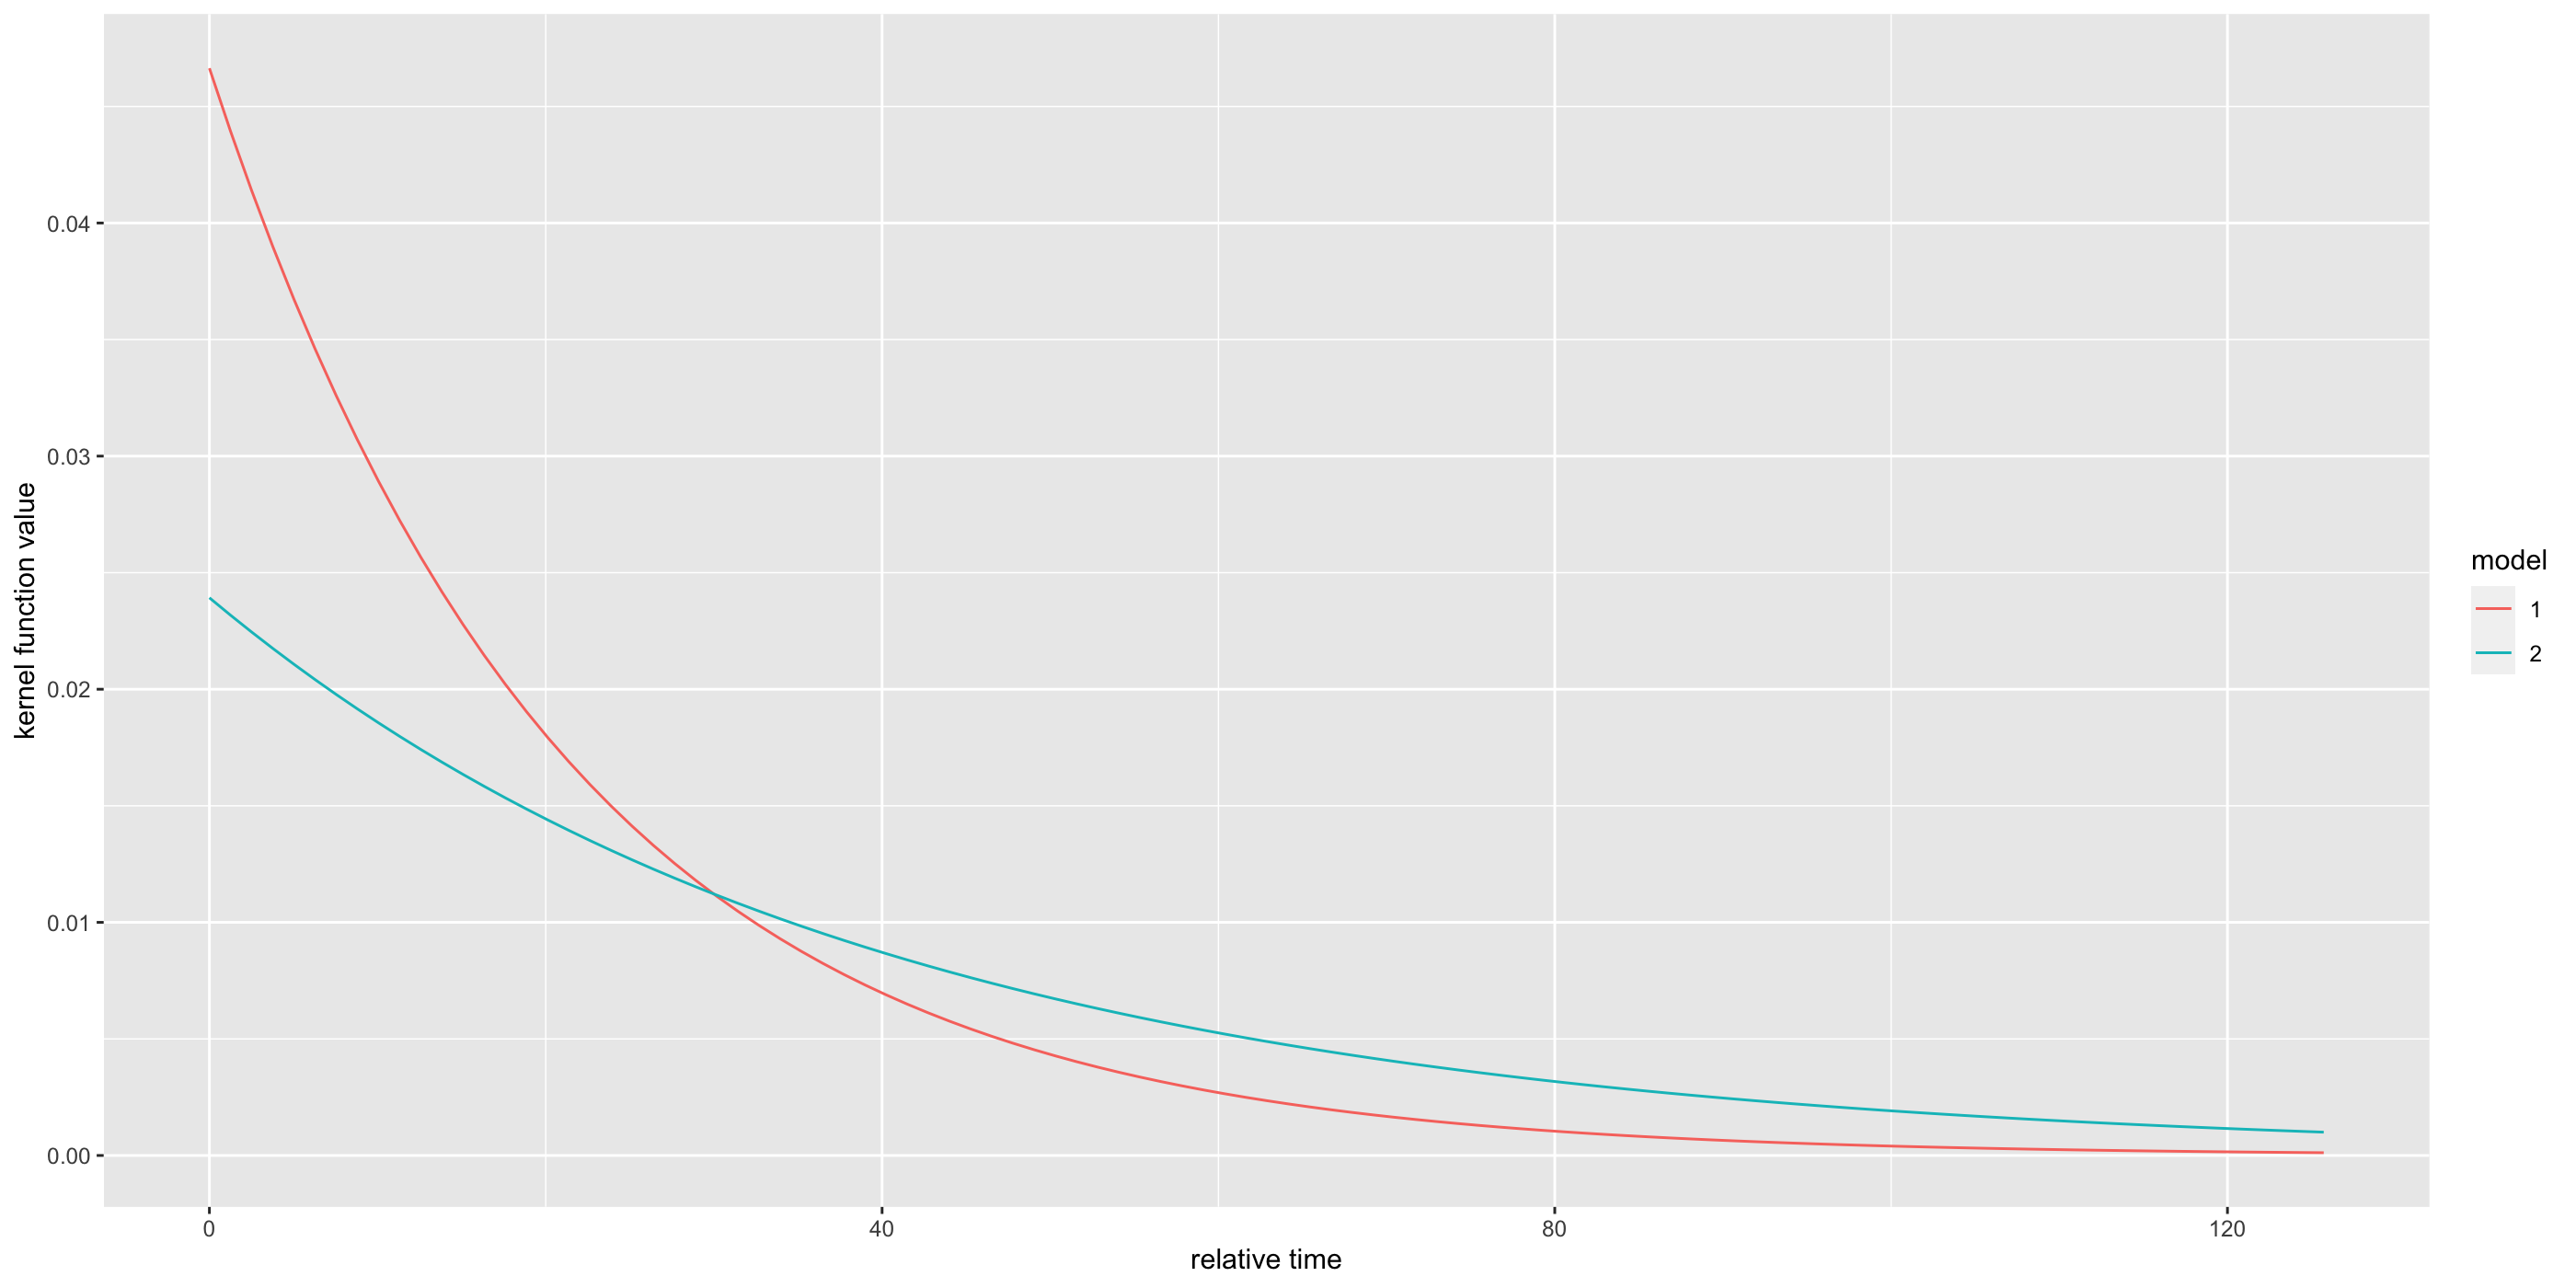

In [11]:
plot_kernel_function(list(user1_model, user2_model))

In [12]:
get_viral_score(user1_model)
get_viral_score(user2_model)

[1] 52.9986

[1] 18.00382

Na podstawie powyższego wykresu można zauważyć, że użytkownik 1 zdobył więcej nagród w krótkim czasie i jego aktywność szybko spadła, co potwierdza także wyższy viral score. Natomiast użytkownik 2 zdobywa nagrody bardziej sumiennie, przez dłuższy okres czasu. Jego posty są bardziej angażujące i mają większy wpływ na społeczność StackOverflow.